# Design Thinking and DS Workflow

### First stage is Empathize 
In this stage time is dedicated to understanding the business opportunities.
In this setting the frequency and duration of customer visits are going to be related to overall sales. The initial business opportunity here is: How do you ensure new games drive revenue? There are many other business opportunities, like what is the optimal menu for the customer-base and do seasonal variations of offerings help the business? For now,  let's focus on ensuring that new games drive revenue for this example.

In [55]:
import requests
text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text

with open("sherlock-holmes.txt", "w",encoding='utf-8',) as text_file:
    text_file.write(text)

## Define - Определить
This is the data wrangling stage - Это этап обработки данных
Given the data, an understanding of the business scenario and your gathered domain knowledge you will next perform your data cleaning and preliminary exploratory data analysis. To get to the point of preliminary investigation into the findings from the empathize stage it is frequently the case that we need to clean our data.

This could involve parsing JSON, manipulating SQL queries, reading CSV, cleaning a corpus of text, sifting through images, and so much more. One common goal of this part of the process is the creation of one or more pandas dataframes or NumPy arrays that will be used for initial exploratory data analysis (EDA).  

In [56]:
txt = open('sherlock-holmes.txt', 'r', encoding='utf').read()

In [80]:
import re
stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences]

In [81]:
len(sentences)

7519

In [82]:

df = pd.read_csv('sherlock_holms.csv')
sentences = sentences[:-3]

In [83]:
df['text'] = sentences

In [84]:
df

has_sherlock  has_watson  \
0             True       False   
1            False       False   
2            False       False   
3            False       False   
4            False       False   
...            ...         ...   
7511         False       False   
7512         False       False   
7513         False       False   
7514         False       False   
7515         False       False   

                                                   text  
0     ï»¿  project gutenberg's the adventures of she...  
1       you may copy it, give it away or  re-use it ...  
2                                             gutenberg  
3     org      title: the adventures of sherlock hol...  
4                           a scandal in bohemia     ii  
...                                                 ...  
7511      project gutenberg-tm ebooks are often crea...  
7512                                                  s  
7513              unless a copyright notice is included  
7514   thus, we do not  necessarily keep ebooks in c...  
7515      most people start at our web site which ha...  

[7516 rows x 3 columns]

In [85]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# text = open('sherlock-holmes.txt', 'r').read()

# ## do some basic parsing and cleaning of sentences
# stop_pattern = '\.|\?|\!'
# sentences = re.split(stop_pattern, text)
# sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences][3:]

# ## load labels and create a pandas df
# df = pd.read_csv('sherlock-holmes-annotations.csv')
# df['text'] = sentences



In [87]:
df['num_words'] = df['text'].apply(lambda x: len(x.split(' ')))

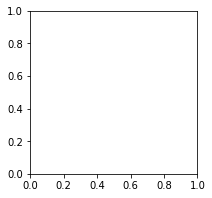

In [91]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111)

data1 = df[df['has_sherlock'] == True]
data2 = df[df['has_watson'] == True]

In [90]:
data1

has_sherlock  has_watson  \
0             True       False   
14            True       False   
25            True       False   
27            True       False   
32            True       False   
...            ...         ...   
7267          True       False   
7282          True       False   
7291          True       False   
7292          True       False   
7414          True       False   

                                                   text  num_words  
0     ï»¿  project gutenberg's the adventures of she...         35  
14           the adventure of the beryl coronet     xii         15  
25     but for the trained  reasoner to admit such i...         37  
27     and  yet there was but one woman to him, and ...         25  
32      from time to time i heard some vague account...         63  
...                                                 ...        ...  
7267   he wanted her  to sign a paper, so that wheth...         22  
7282      âand in this way he managed that your go...         38  
7291    they still live with their old servants, who...         28  
7292                                                 mr          2  
7414   royalty    payments should be clearly marked ...         47  

[542 rows x 4 columns]

In [105]:
#data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock','has_watson']]

In [97]:
# df[df['has_sherlock']==True]['num_words'].values

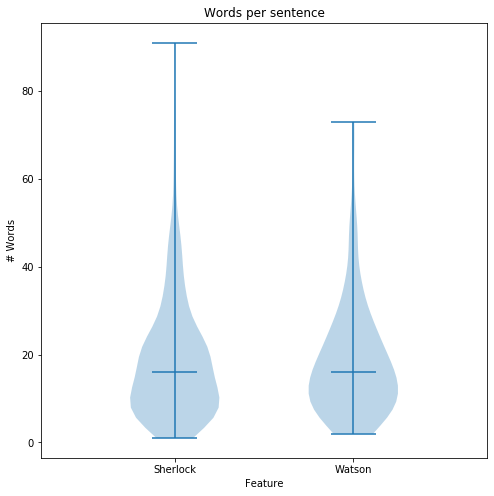

In [106]:
## make eda plot
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

data1 = df[df['has_sherlock']==True]
data2 = df[df['has_watson']==True]

data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock','has_watson']]

pos = [1,2]
ax1.violinplot(data, pos, points=40, widths=0.5,showextrema=True, showmedians=True)

labels = ['Sherlock', 'Watson']
ax1.set_xticks(np.arange(1, len(labels) + 1))
ax1.set_xticklabels(labels)
ax1.set_xlim(0.25, len(labels) + 0.75)
ax1.set_xlabel('Feature')
ax1.set_ylabel('# Words')
ax1.set_title("Words per sentence")

plt.show()

# Ideate
This is the stage where we modify our data and our features

Now that you have clean data the data processing must continue until you are ready to input your data into a model. This stage contains all of the possible data manipulations you might perform before modeling. Perhaps the data need to be log transformed, standardized, reduced in dimensionality, kernel transformed, engineered to contain more features or transformed in some other way.

For our text data we would likely want to dig into the sentences themselves to make sure they fit the desired use case. If we were building a chatbot to engage with in a very Holmes manner then we would likely want to remove any sentences that were not said by Mr. Holmes, but his name was mentioned. If we were building a predictive model to determine which story a phrase would most likely have been generated, we would need to create a new column in our data frame representing the books themselves.

When working with text data many models that we might consider prefer a numeric representation of the data. This may be occurrences, frequencies, or another transformation of the original data. It is in this stage that these types of transformations are readied or carried out. For example here we import the necessary transformers for usage in the next stage.  

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

labels = np.zeros(df.shape[0])
labels[(df['has_sherlock'] == True)] = 1
labels[df['has_watson'] == True] = 2
df['labels'] = labels

In [137]:
df[df['labels'] == 2.0]

has_sherlock  has_watson  \
44           False        True   
48           False        True   
134          False        True   
161          False        True   
274          False        True   
...            ...         ...   
7167         False        True   
7197         False        True   
7214         False        True   
7226         False        True   
7284         False        True   

                                                   text  num_words  labels  
44     with hardly a word spoken, but with a kindly ...         36     2.0  
48                                      â    âseven          5     2.0  
134    âyes,â he continued, glancing out of  the...         10     2.0  
161   â he looked from  one to the other of us, as...         17     2.0  
274                            that will be next monday          6     2.0  
...                                                 ...        ...     ...  
7167   the most serious point in the case  is the di...         15     2.0  
7197   no sound came  from within, and at the silenc...         15     2.0  
7214             â    âhe has come back and done it         11     2.0  
7226                                you are in my power          6     2.0  
7284     â    âi am sure we owe you an apology, mrs         13     2.0  

[156 rows x 5 columns]

In [141]:
df = df[df['labels']!=0]
X = df['text'].values
y = df['labels'].values

There are a lot of ways to prepare data for different models. In some case you will not know the best transformation or series of transformations until you have run the different models and made a comparison. The concept of pipelines is extremely useful for iterating over different permutations of transformers and models. The following topics will be covered in detail during Module 3.

Unsupervised learning
Feature engineering
Dimension Reduction
Simulation
Missing value imputation
Outlier detection
HINT:  This is the stage where we enumerate the advantages and disadvantages of the possible modeling solutions  

Once the transformations are carried or staged as part of some pipeline it is a valuable exercise to document what you know about the process so far. The form that this most commonly takes is a table of possible modeling strategies complete with the advantages and disadvantages of each.  

Prototype

# Protopype

This is the modeling stage

The data have been cleaned, processed and staged (ideally in a pipeline) for modeling. The modeling (classic statistics and machine learning) is the bread and butter of data science. This is the stage where most data scientists want to spend the majority of their time. It is where you will interface with the most intriguing aspects of this discipline.  

To illustrate the process to the end shown below is a Support Vector Machine with Stochastic gradient decent as a model. The process involves the use of a train-test split and a pipeline because we want you to be exposed from the very beginning of this course with best practices. Given this example we also see that there can be considerable overlap between the ideate and prototype stages. The overlap exists because transformations of data are generally specific to models–as you will explore which model fits the situation best you will be modifying the transformations of your data.  

In [146]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

## carry out the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None))
])

## train a model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

## Testing

This is the production, testing and feedback loop stage

The model works and there are evaluation metrics to provide insight into how well it works. However, the process does not end here. Perhaps the model runs, but it is not yet in production or maybe you want to try different models and/or transformers. Once in production you might want to run some tests to determine if it will handle load or if it will scale well as the data grows. A working model with an impressive f-score does not mean it will be effective in practice. This stage is dedicated to all of the considerations that come after the initial modeling is carried out.  

It is also the stage where you will determine how best to iterate. Design thinking like data science is an iterative process. Our model performed very well (see below), possibly because Dr. Holmes and Dr. Watson are described in very different ways in the stories, but it could be something else.  

In [147]:
from sklearn import metrics

#evaluate the model perfromance

predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted, target_names=['sherlock', 'watson']))

              precision    recall  f1-score   support

    sherlock       0.78      0.92      0.84       176
      watson       0.18      0.06      0.09        50

    accuracy                           0.73       226
   macro avg       0.48      0.49      0.47       226
weighted avg       0.64      0.73      0.68       226



#  is this the best way for me or my team to address the business problem?

In [152]:
import sys
import re
import os
import requests
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## save the book locally
if not os.path.exists('sherlock-holmes.txt'):
    text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text
    with open("sherlock-holmes.txt", "w", encoding='utf-8') as text_file:
        text_file.write(text)

## read in the book
text = open('sherlock-holmes.txt', 'r', encoding='utf-8').read()

## do some basic parsing and cleaning of sentences
stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences][3:]

## load labels and create a pandas df
df = pd.read_csv('sherlock-holmes-annotations.csv')
df['text'] = sentences

## extract the data to be used in the model from the df
labels = np.zeros(df.shape[0])
labels[(df['has_sherlock'] == True)] = 1
labels[(df['has_watson'] == True)] = 2
df['labels'] = labels
df = df[df['labels']!=0]
X = df['text'].values
y = df['labels'].values

## carry out the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None))
    ])

## train a model
text_clf.fit(X_train, y_train)

## evaluate the model performance
predicted = text_clf.predict(X_test)
print(np.mean(predicted == y_test))

print(metrics.classification_report(y_test, predicted,
      target_names=['sherlock','watson']))

0.8805309734513275
              precision    recall  f1-score   support

    sherlock       0.90      0.95      0.93       176
      watson       0.78      0.64      0.70        50

    accuracy                           0.88       226
   macro avg       0.84      0.79      0.81       226
weighted avg       0.88      0.88      0.88       226



There are numerous correct answers and if you came up with something similar to the following your are on the right track. Because customer frequency and duration are essentially proxies for revenue and because the relationship between these data and the game is direct we ask our questions with this in mind rather than revenue directly. Asking in terms of revenue directly is not wrong in this case, but a positive correlation is harder to interpret due to likely presence of confounding factors

Which games are most associated with sales?
Is my new game a stronger predictor of frequency and duration than other games?
Is my new game more strongly correlated with frequency and duration than other games?
In a predictive model does my new game have a stronger feature importance then other games?

Question 2
If you were to munge the data into a pandas.DataFrame which of the following would describe a reasonable goal for the cleaning process? - transactions on the rows and items like customer_name and item_id on the columns (Because the initial goal of the data clean-up should be to get the data into as a form that is as granular as possible. We can always derive summary level data from the more detailed data frames.)

In the above results output the support is the number of occurrences of each class in y_true. It follows that we have relatively unbalanced classes and we made no special accommodation for this situation. It is a major purpose of this stage to be critical and reflect on the process, the finding all the while keeping in mind the central business question.

Knowing that our classes are in-balanced we need to be careful about using accuracy as a metric. We will do a deeper dive into both in-balanced classes and evaluation metrics in this course. Give a sentence we do a better job predicting a sherlock context than a watson one. This is where we want to be critical and start asking questions like:

My game in production will likely see many different sentences. Would a negative class improve my model?
I need to compare this game to the others and relate it to revenue how do I accomplish this?
Is developing a new game even worth the effort or is there another way to use DS to help my friend?